# Clasificación binaria

In [ ]:
import pandas as pd
import seaborn as sns
from google.colab import files
import numpy as np
import datetime
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Nos descargamos los dataframes con los datos de los viajes de las comunidades de Andalucía y Castilla-La Mancha.

In [ ]:
df_clm = pd.read_csv("/content/drive/MyDrive/Datos/df_castilla.csv") 
df_clm.head(7)

,Unnamed: 0,DIA,AÑO,SEMANA,MES,PAIS,ORIGEN,DESTINO,ASIENTOS_OFERTADOS,ASIENTOS_CONFIRMADOS,VIAJES_OFERTADOS,VIAJES_CONFIRMADOS,OFERTANTES,OFERTANTES_NUEVOS,CA_ORIGEN,CA_DESTINO,PROVINCIA_ORIGEN,PROVINCIA_DESTINO,INTERPROVINCIAL,Festivo
0,453525,2017-11-05,2017,44,11,es,Albacete,Guadalajara,11.0,1,6,1,6,1,Castilla-La Mancha,Castilla-La Mancha,Albacete,Guadalajara,No,No
1,453526,2017-11-12,2017,45,11,es,Albacete,Guadalajara,11.0,1,6,1,6,1,Castilla-La Mancha,Castilla-La Mancha,Albacete,Guadalajara,No,No
2,453527,2017-11-19,2017,46,11,es,Albacete,Guadalajara,8.0,1,6,1,6,0,Castilla-La Mancha,Castilla-La Mancha,Albacete,Guadalajara,No,No
3,453528,2017-12-01,2017,48,12,es,Albacete,Guadalajara,3.0,3,1,1,1,0,Castilla-La Mancha,Castilla-La Mancha,Albacete,Guadalajara,No,No
4,453529,2017-12-10,2017,49,12,es,Albacete,Guadalajara,3.0,1,2,1,2,0,Castilla-La Mancha,Castilla-La Mancha,Albacete,Guadalajara,No,No
5,453530,2017-12-12,2017,50,12,es,Albacete,Guadalajara,3.0,1,1,1,1,1,Castilla-La Mancha,Castilla-La Mancha,Albacete,Guadalajara,No,No
6,453531,2017-12-22,2017,51,12,es,Albacete,Guadalajara,2.0,1,1,1,1,0,Castilla-La Mancha,Castilla-La Mancha,Albacete,Guadalajara,No,No


In [ ]:
df_andalucia = pd.read_csv("/content/drive/MyDrive/Datos/df_andalucia.csv") 
df_andalucia.head(7)

,Unnamed: 0,DIA,AÑO,SEMANA,MES,PAIS,ORIGEN,DESTINO,ASIENTOS_OFERTADOS,ASIENTOS_CONFIRMADOS,VIAJES_OFERTADOS,VIAJES_CONFIRMADOS,OFERTANTES,OFERTANTES_NUEVOS,CA_ORIGEN,CA_DESTINO,PROVINCIA_ORIGEN,PROVINCIA_DESTINO,INTERPROVINCIAL,Festivo
0,285649,2017-11-01,2017,44,11,es,Albox,Granada,1.0,1,1,1,1,0,Andalucía,Andalucía,Almería,Granada,No,Si
1,285650,2017-11-03,2017,44,11,es,Albox,Granada,12.0,1,4,1,4,0,Andalucía,Andalucía,Almería,Granada,No,No
2,285651,2017-11-05,2017,44,11,es,Albox,Granada,2.0,1,1,1,1,0,Andalucía,Andalucía,Almería,Granada,No,No
3,285652,2017-11-06,2017,45,11,es,Albox,Granada,2.0,2,1,1,1,0,Andalucía,Andalucía,Almería,Granada,No,No
4,285653,2017-11-10,2017,45,11,es,Albox,Granada,13.0,1,5,1,5,1,Andalucía,Andalucía,Almería,Granada,No,No
5,285654,2017-11-12,2017,45,11,es,Albox,Granada,3.0,3,1,1,1,0,Andalucía,Andalucía,Almería,Granada,No,No
6,285655,2017-11-17,2017,46,11,es,Albox,Granada,6.0,1,3,1,3,1,Andalucía,Andalucía,Almería,Granada,No,No


Eliminamos la columna unnamed

In [ ]:
df_clm = df_clm.drop(df_clm.columns[[0]], axis=1)
df_andalucia = df_andalucia.drop(df_andalucia.columns[[0]], axis=1)

Las ordenamos por año y semana

In [ ]:
df_clm = df_clm.sort_values(by = ['DIA','AÑO','SEMANA'])
df_andalucia = df_andalucia.sort_values(by = ['DIA','AÑO','SEMANA'])

Codificamos las variables no numéricas, ORIGEN y DESTINO

In [ ]:
clm = df_clm.copy()
clm[['ORIGEN','DESTINO','INTERPROVINCIAL']] = df_clm[['ORIGEN','DESTINO','INTERPROVINCIAL']].apply(preprocessing.LabelEncoder().fit_transform)
clm

,DIA,AÑO,SEMANA,MES,PAIS,ORIGEN,DESTINO,ASIENTOS_OFERTADOS,ASIENTOS_CONFIRMADOS,VIAJES_OFERTADOS,VIAJES_CONFIRMADOS,OFERTANTES,OFERTANTES_NUEVOS,CA_ORIGEN,CA_DESTINO,PROVINCIA_ORIGEN,PROVINCIA_DESTINO,INTERPROVINCIAL,Festivo
411,2017-11-01,2017,44,11,es,9,1,24.0,2,9,2,9,0,Castilla-La Mancha,Castilla-La Mancha,Albacete,Albacete,1,Si
1708,2017-11-01,2017,44,11,es,63,1,6.0,1,2,1,2,0,Castilla-La Mancha,Castilla-La Mancha,Ciudad Real,Albacete,0,Si
1762,2017-11-01,2017,44,11,es,71,1,5.0,1,2,1,2,0,Castilla-La Mancha,Castilla-La Mancha,Ciudad Real,Albacete,0,Si
1900,2017-11-01,2017,44,11,es,74,1,1.0,1,1,1,1,0,Castilla-La Mancha,Castilla-La Mancha,Ciudad Real,Albacete,0,Si
2246,2017-11-01,2017,44,11,es,117,1,13.0,4,5,2,5,0,Castilla-La Mancha,Castilla-La Mancha,Toledo,Albacete,0,Si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20794,2019-10-31,2019,44,10,es,117,59,10.0,1,8,1,8,2,Castilla-La Mancha,Castilla-La Mancha,Toledo,Ciudad Real,0,No
20813,2019-10-31,2019,44,10,es,40,37,1.0,1,1,1,1,0,Castilla-La Mancha,Castilla-La Mancha,Cuenca,Cuenca,1,No
20820,2019-10-31,2019,44,10,es,117,150,1.0,1,1,1,1,0,Castilla-La Mancha,Castilla-La Mancha,Toledo,Cuenca,0,No
20841,2019-10-31,2019,44,10,es,117,32,2.0,1,1,1,1,0,Castilla-La Mancha,Castilla-La Mancha,Toledo,Toledo,1,No


In [ ]:
andalucia =df_andalucia.copy()
andalucia[['ORIGEN','DESTINO','INTERPROVINCIAL']] = df_andalucia[['ORIGEN','DESTINO','INTERPROVINCIAL']].apply(preprocessing.LabelEncoder().fit_transform)
andalucia

,DIA,AÑO,SEMANA,MES,PAIS,ORIGEN,DESTINO,ASIENTOS_OFERTADOS,ASIENTOS_CONFIRMADOS,VIAJES_OFERTADOS,VIAJES_CONFIRMADOS,OFERTANTES,OFERTANTES_NUEVOS,CA_ORIGEN,CA_DESTINO,PROVINCIA_ORIGEN,PROVINCIA_DESTINO,INTERPROVINCIAL,Festivo
0,2017-11-01,2017,44,11,es,6,218,1.0,1,1,1,1,0,Andalucía,Andalucía,Almería,Granada,0,Si
148,2017-11-01,2017,44,11,es,18,218,27.0,15,10,6,10,0,Andalucía,Andalucía,Cádiz,Granada,0,Si
872,2017-11-01,2017,44,11,es,29,218,68.0,22,26,13,25,0,Andalucía,Andalucía,Almería,Granada,0,Si
1899,2017-11-01,2017,44,11,es,44,218,4.0,1,3,1,3,0,Andalucía,Andalucía,Cádiz,Granada,0,Si
2489,2017-11-01,2017,44,11,es,59,218,20.0,1,11,1,11,0,Andalucía,Andalucía,Granada,Granada,1,Si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245917,2019-10-31,2019,44,10,es,418,43,5.0,2,2,1,2,0,Andalucía,Andalucía,Sevilla,Huelva,0,No
245924,2019-10-31,2019,44,10,es,418,32,1.0,1,1,1,1,0,Andalucía,Andalucía,Sevilla,Córdoba,0,No
245938,2019-10-31,2019,44,10,es,328,71,2.0,2,1,1,1,0,Andalucía,Andalucía,Málaga,Jaén,0,No
245999,2019-10-31,2019,44,10,es,418,56,2.0,2,1,1,1,0,Andalucía,Andalucía,Sevilla,Huelva,0,No


Vemos la correlacion de las variables

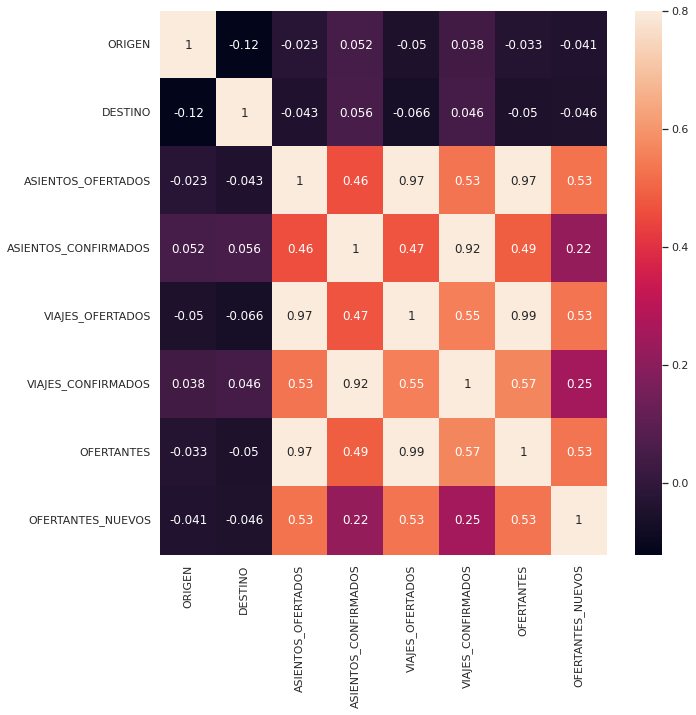

In [ ]:
corrmat_red = clm[['DIA','ORIGEN','DESTINO','ASIENTOS_OFERTADOS','ASIENTOS_CONFIRMADOS','VIAJES_OFERTADOS','VIAJES_CONFIRMADOS','OFERTANTES','OFERTANTES_NUEVOS']].corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap( corrmat_red , vmax = .8, annot=True, ax=ax)

Seleccionamos las columnas que necesitamos

In [ ]:
colums_we_want = ['DIA','AÑO','MES','SEMANA','ORIGEN','DESTINO','ASIENTOS_OFERTADOS', 'VIAJES_OFERTADOS', 'VIAJES_CONFIRMADOS','INTERPROVINCIAL']
clm = clm[colums_we_want]
andalucia = andalucia[colums_we_want]
clm.head()

,DIA,AÑO,MES,SEMANA,ORIGEN,DESTINO,ASIENTOS_OFERTADOS,VIAJES_OFERTADOS,VIAJES_CONFIRMADOS,INTERPROVINCIAL
411,2017-11-01,2017,11,44,9,1,24.0,9,2,1
1708,2017-11-01,2017,11,44,63,1,6.0,2,1,0
1762,2017-11-01,2017,11,44,71,1,5.0,2,1,0
1900,2017-11-01,2017,11,44,74,1,1.0,1,1,0
2246,2017-11-01,2017,11,44,117,1,13.0,5,2,0


In [ ]:
andalucia.head()

,DIA,AÑO,MES,SEMANA,ORIGEN,DESTINO,ASIENTOS_OFERTADOS,VIAJES_OFERTADOS,VIAJES_CONFIRMADOS,INTERPROVINCIAL
0,2017-11-01,2017,11,44,6,218,1.0,1,1,0
148,2017-11-01,2017,11,44,18,218,27.0,10,6,0
872,2017-11-01,2017,11,44,29,218,68.0,26,13,0
1899,2017-11-01,2017,11,44,44,218,4.0,3,1,0
2489,2017-11-01,2017,11,44,59,218,20.0,11,1,1


In [ ]:
import datetime

def poner_dias(df):
  lista = []
  for i in df.index:
    date = datetime.datetime.strptime(df["DIA"][i], '%Y-%m-%d')
    current_day = (date - datetime.datetime(df['AÑO'][i]-1, 12, 31))
    lista.append(current_day.days)

  print(lista)
  
  df["DIA"] = lista

In [ ]:
poner_dias(clm)
poner_dias(andalucia)

[305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 310, 310, 310, 310, 310, 310, 310, 310, 310, 310, 310, 310, 310, 310, 310, 310, 310, 310, 311, 311, 311, 311, 311, 311, 311,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


[305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305,

Añadimos la columna viaje, que puede tomar 2 valores, si hay viaje o si no (0 = no y 1 = si).

En este caso le ponemos a todas un 1.

In [ ]:
lista = []
for i in range(clm['AÑO'].size):
  lista.append(1)
clm['VIAJE'] = lista
clm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,DIA,AÑO,MES,SEMANA,ORIGEN,DESTINO,ASIENTOS_OFERTADOS,VIAJES_OFERTADOS,VIAJES_CONFIRMADOS,INTERPROVINCIAL,VIAJE
411,305,2017,11,44,9,1,24.0,9,2,1,1
1708,305,2017,11,44,63,1,6.0,2,1,0,1
1762,305,2017,11,44,71,1,5.0,2,1,0,1
1900,305,2017,11,44,74,1,1.0,1,1,0,1
2246,305,2017,11,44,117,1,13.0,5,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
20794,304,2019,10,44,117,59,10.0,8,1,0,1
20813,304,2019,10,44,40,37,1.0,1,1,1,1
20820,304,2019,10,44,117,150,1.0,1,1,0,1
20841,304,2019,10,44,117,32,2.0,1,1,1,1


In [ ]:
lista = []
for i in range(andalucia['AÑO'].size):
  lista.append(1)
andalucia['VIAJE'] = lista
andalucia

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,DIA,AÑO,MES,SEMANA,ORIGEN,DESTINO,ASIENTOS_OFERTADOS,VIAJES_OFERTADOS,VIAJES_CONFIRMADOS,INTERPROVINCIAL,VIAJE
0,305,2017,11,44,6,218,1.0,1,1,0,1
148,305,2017,11,44,18,218,27.0,10,6,0,1
872,305,2017,11,44,29,218,68.0,26,13,0,1
1899,305,2017,11,44,44,218,4.0,3,1,0,1
2489,305,2017,11,44,59,218,20.0,11,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
245917,304,2019,10,44,418,43,5.0,2,1,0,1
245924,304,2019,10,44,418,32,1.0,1,1,0,1
245938,304,2019,10,44,328,71,2.0,1,1,0,1
245999,304,2019,10,44,418,56,2.0,1,1,0,1


Ahora vamos a averiguar en cuántas semanas no hay viajes para añadir las filas correspondientes

In [ ]:
def dias_sin_viaje(df, año):
  lista=[]
  dias = list(range(1,365))
  df_año = df[df['AÑO'] == año]
  days = df_año["DIA"].tolist()
  days = list(set(days))
  for i in dias:
    if i not in days:
      lista.append(i)
  return lista

In [ ]:
diasCLM2017 = dias_sin_viaje(clm, 2017)
diasCLM2018 = dias_sin_viaje(clm, 2018)
diasCLM2019 = dias_sin_viaje(clm, 2019)

In [ ]:
diasAndalucia2017 = dias_sin_viaje(andalucia, 2017)
diasAndalucia2018 = dias_sin_viaje(andalucia, 2018)
diasAndalucia2019 = dias_sin_viaje(andalucia, 2019)

In [ ]:
print(diasCLM2019)

[305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364]


Generamos las filas que hay que añadir al df con las columnas que tiene, en este caso el valor de viaje va a ser 0 y el origen y destino -1.

In [ ]:
def lista_dias(dias, año):
  lista = []
  for i in dias:
    lista.append([i,año,int(i/7),-1,-1,0,0,0,0,0,0])
  return lista

In [ ]:
lista_diasCLM2017 = lista_dias(diasCLM2017, 2017)
lista_diasCLM2018 = lista_dias(diasCLM2018, 2018)
lista_diasCLM2019 = lista_dias(diasCLM2019, 2019)

lista_diasAndalucia2017 = lista_dias(diasAndalucia2017, 2017)
lista_diasAndalucia2018 = lista_dias(diasAndalucia2018, 2018)
lista_diasAndalucia2019 = lista_dias(diasAndalucia2019, 2019)

Introducimos las filas al df

In [ ]:
def añadir_no_viajes(df, dias):
  for i in dias:
    df.loc[len(df.index)] = i
  return df

In [ ]:
finalCLM = añadir_no_viajes(clm, lista_diasCLM2017)
finalCLM = añadir_no_viajes(clm, lista_diasCLM2018)
finalCLM = añadir_no_viajes(clm, lista_diasCLM2019)

finalAndalucia = añadir_no_viajes(andalucia, lista_diasAndalucia2017)
finalAndalucia = añadir_no_viajes(andalucia, lista_diasAndalucia2018)
finalAndalucia = añadir_no_viajes(andalucia, lista_diasAndalucia2019)

finalCLM.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,DIA,AÑO,MES,SEMANA,ORIGEN,DESTINO,ASIENTOS_OFERTADOS,VIAJES_OFERTADOS,VIAJES_CONFIRMADOS,INTERPROVINCIAL,VIAJE
411,305,2017,11,44,9,1,24.0,9,2,1,1
1708,305,2017,11,44,63,1,6.0,2,1,0,1
1762,305,2017,11,44,71,1,5.0,2,1,0,1
1900,305,2017,11,44,74,1,1.0,1,1,0,1
2246,305,2017,11,44,117,1,13.0,5,2,0,1


In [ ]:
finalCLM = finalCLM.sort_values(by = ['AÑO','SEMANA'])
finalCLM

,DIA,AÑO,MES,SEMANA,ORIGEN,DESTINO,ASIENTOS_OFERTADOS,VIAJES_OFERTADOS,VIAJES_CONFIRMADOS,INTERPROVINCIAL,VIAJE
20862,1,2017,0,-1,-1,0,0.0,0,0,0,0
20863,2,2017,0,-1,-1,0,0.0,0,0,0,0
20864,3,2017,0,-1,-1,0,0.0,0,0,0,0
20865,4,2017,0,-1,-1,0,0.0,0,0,0,0
20866,5,2017,0,-1,-1,0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
20794,304,2019,10,44,117,59,10.0,8,1,0,1
20813,304,2019,10,44,40,37,1.0,1,1,1,1
20820,304,2019,10,44,117,150,1.0,1,1,0,1
20841,304,2019,10,44,117,32,2.0,1,1,1,1


In [ ]:
finalAndalucia = finalAndalucia.sort_values(by = ['AÑO','SEMANA'])
finalAndalucia

,DIA,AÑO,MES,SEMANA,ORIGEN,DESTINO,ASIENTOS_OFERTADOS,VIAJES_OFERTADOS,VIAJES_CONFIRMADOS,INTERPROVINCIAL,VIAJE
246055,1,2017,0,-1,-1,0,0.0,0,0,0,0
246056,2,2017,0,-1,-1,0,0.0,0,0,0,0
246057,3,2017,0,-1,-1,0,0.0,0,0,0,0
246058,4,2017,0,-1,-1,0,0.0,0,0,0,0
246059,5,2017,0,-1,-1,0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
245917,304,2019,10,44,418,43,5.0,2,1,0,1
245924,304,2019,10,44,418,32,1.0,1,1,0,1
245938,304,2019,10,44,328,71,2.0,1,1,0,1
245999,304,2019,10,44,418,56,2.0,1,1,0,1


COSAS DE COMBINACIÓN BINARIA?

VIAJE
0      364
1    20862
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


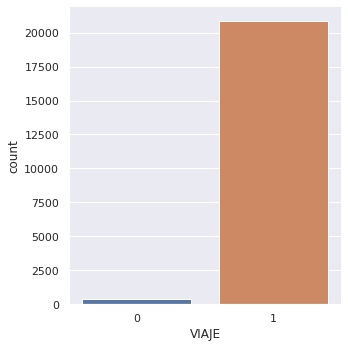

In [ ]:
import seaborn as sb
sb.set(style='darkgrid')

print(finalCLM.groupby('VIAJE').size())
   
sb.factorplot('VIAJE', data=finalCLM, kind='count')

VIAJE
0       364
1    246055
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


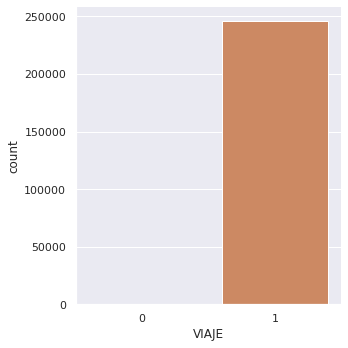

In [ ]:
sb.set(style='darkgrid')

print(finalAndalucia.groupby('VIAJE').size())
   
sb.factorplot('VIAJE', data=finalAndalucia, kind='count')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


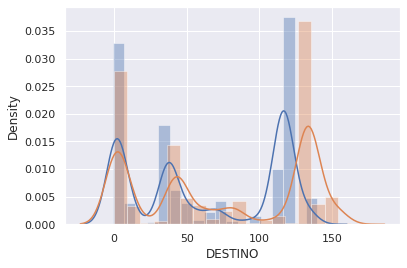

In [ ]:
sb.distplot(finalCLM['ORIGEN'])
sb.distplot(finalCLM['DESTINO'])

RANDOM FOREST

In [ ]:
finalCLM.head(2)

,DIA,AÑO,MES,SEMANA,ORIGEN,DESTINO,ASIENTOS_OFERTADOS,VIAJES_OFERTADOS,VIAJES_CONFIRMADOS,INTERPROVINCIAL,VIAJE
20862,1,2017,0,-1,-1,0,0.0,0,0,0,0
20863,2,2017,0,-1,-1,0,0.0,0,0,0,0


In [ ]:
features_selected = ['DIA','AÑO','MES','SEMANA' ,'ORIGEN','DESTINO','INTERPROVINCIAL']

In [ ]:
X = finalCLM[features_selected].set_index('DIA')
y = finalCLM['VIAJE']

# sample a training set while holding out 40% of the data for testing (evaluating) our classifier:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split = 65, 
                                  min_samples_leaf = 20, max_depth = 4, 
                                  class_weight={0:3.28})
# fit: training the model
clf.fit(X_train, y_train) # Construcción del modelo

# prediction/test
preds = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print("Metrics \n" 
      +classification_report(y_true=y_test, y_pred=preds))

# Confussion Matrix
print("Confussion Matrix:\n")
matriz = pd.crosstab(y_test, preds, rownames=['actual'], colnames=['preds'])
print(matriz)

print(pd.DataFrame({'Feature': ['AÑO','MES','SEMANA' ,'ORIGEN','DESTINO','INTERPROVINCIAL'] ,
              'Importance': clf.feature_importances_}),"\n")


Metrics 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00      8350

    accuracy                           1.00      8491
   macro avg       1.00      1.00      1.00      8491
weighted avg       1.00      1.00      1.00      8491

Confussion Matrix:

preds     0     1
actual           
0       141     0
1         0  8350
           Feature    Importance
0              AÑO  0.000000e+00
1              MES  0.000000e+00
2           SEMANA  1.000000e+00
3           ORIGEN  0.000000e+00
4          DESTINO  1.865708e-14
5  INTERPROVINCIAL  0.000000e+00 



Confusion matrix plot:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


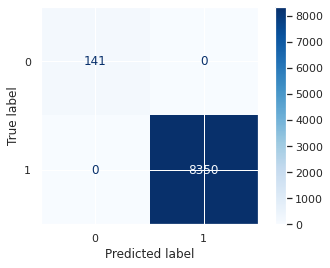

In [ ]:
disp = plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues) 
plt.show()

In [ ]:
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

In [ ]:
from IPython.display import Image
import pydot
from six import StringIO

dot_data = StringIO()
#tree.export_graphviz(clf, out_file=dot_data, feature_names=list(spy.drop(['CLASIFICADOR'], axis=1)))
tree.export_graphviz(clf, out_file = dot_data, proportion = True,
                     feature_names=features_selected, 
                     class_names = ['0','1'], rounded = True, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

ValueError: ignored

## Predicción para el usuario en Castilla-la Mancha

In [ ]:
orig = df_clm.ORIGEN.astype('category')
origen_dic = dict(enumerate(orig.cat.categories))

desti = df_clm.DESTINO.astype('category')
destino_dic = dict(enumerate(desti.cat.categories))

interprovincial_clm = df_clm.INTERPROVINCIAL.astype('category')
interprovincial_dic_clm =dict(enumerate(interprovincial_clm.cat.categories))

In [ ]:
#@title ORIGEN

origen = 'Ciudad Real' #@param {type:"string"}

origen_clm = list(origen_dic.keys())[list(origen_dic.values()).index(origen)]
origen_clm

37

In [ ]:
#@title DESTINO

destino = 'Valdepe\xF1as' #@param {type:"string"}
destino_clm = list(destino_dic.keys())[list(destino_dic.values()).index(destino)]
destino_clm

140

In [ ]:
from datetime import datetime

#@title FECHA DE VIAJE
dia_clm = '2022-01-24' #@param {type:"date"}


date_clm = pd.Timestamp(dia_clm)
mes_clm = date_clm.month

semana_clm = date_clm.week
año_clm = date_clm.year
print(mes_clm,año_clm,semana_clm)

1 2022 4


In [ ]:
dic_caracteristicas_clm = { 'DIA':dia_clm, 'AÑO':año_clm,'MES':mes_clm,'SEMANA':semana_clm,'ORIGEN':origen_clm,'DESTINO':destino_clm,'INTERPROVINCIAL':0}
df_viaje_clm = pd.DataFrame(dic_caracteristicas_clm, index=[0])
df_viaje_clm = df_viaje_clm.set_index('DIA')
df_viaje_clm

,AÑO,MES,SEMANA,ORIGEN,DESTINO,INTERPROVINCIAL
DIA,,,,,,
2022-01-24,2022,1,4,37,140,0


In [ ]:
X_train

,DIA,AÑO,MES,SEMANA,ORIGEN,DESTINO,INTERPROVINCIAL
2026,234,2018,8,34,112,1,0
18965,141,2019,5,21,1,63,1
17174,163,2018,6,24,117,129,1
12318,246,2018,9,36,118,42,1
3272,103,2018,4,15,122,1,0
...,...,...,...,...,...,...,...
13356,344,2018,12,50,1,10,1
16008,4,2019,1,1,1,75,0
15874,131,2018,5,19,1,17,0
5786,324,2017,11,47,1,134,0


In [ ]:
pred_clm =  clf.predict(df_viaje_clm)[0]
print(f'¿Habrá un viaje a {destino} con origen en {origen} el {dia_clm}? Respuesta: {"Si" if pred_clm == 1 else "No"}')

¿Habrá un viaje a Valdepeñas con origen en Ciudad Real el 2022-01-24? Respuesta: Yes
